In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('BankChurners.csv')

In [3]:
cat_cols=df.select_dtypes(include=['object']).columns.to_list()

In [4]:
def categorical_plot(df, cat_cols, num_cols_per_row=None, hue=None):
    """
    Plots the distribution of categorical columns in a pandas DataFrame.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the categorical columns to be plotted.
    cat_cols : list of str
        A list of column names that contain categorical data.
    num_cols_per_row : int
        The number of columns to plot per row.
    hue : str or None, optional
        If not None, specifies the hue cycle to use for the plots.
            Otherwise, uses a default cycle.
    """
    if num_cols_per_row is None:
        num_cols_per_row = 2
    
    num_rows = len(cat_cols) // num_cols_per_row + 1

    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 20))

    if hue is None:
        # Use a default hue cycle when hue is not given
        for i, col in enumerate(cat_cols):
            row_index = i // num_cols_per_row
            col_index = i % num_cols_per_row
            
            ax = axes[row_index, col_index]
            order = df[col].value_counts().index
            sns.countplot(data=df, x=col, ax=ax, hue=col, order=order)
            ax.set_title(col)

            total = len(df[col])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()
                ax.annotate(percentage, (x, y), ha='center', va='bottom')

            ax.set_xlabel('')

    else:
        # Use the given hue cycle when hue is given
        for i, col in enumerate(cat_cols):
            row_index = i // num_cols_per_row
            col_index = i % num_cols_per_row
            
            ax = axes[row_index, col_index]
            order = df[col].value_counts().index
            sns.countplot(data=df, x=col, ax=ax, hue=hue, order=order)
            ax.set_title(col)

            total = len(df[col])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()
                ax.annotate(percentage, (x, y), ha='center', va='bottom')

            ax.set_xlabel('')

    # Deleting the empty graph placeholders
    for i in range(len(cat_cols), num_rows * num_cols_per_row):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()

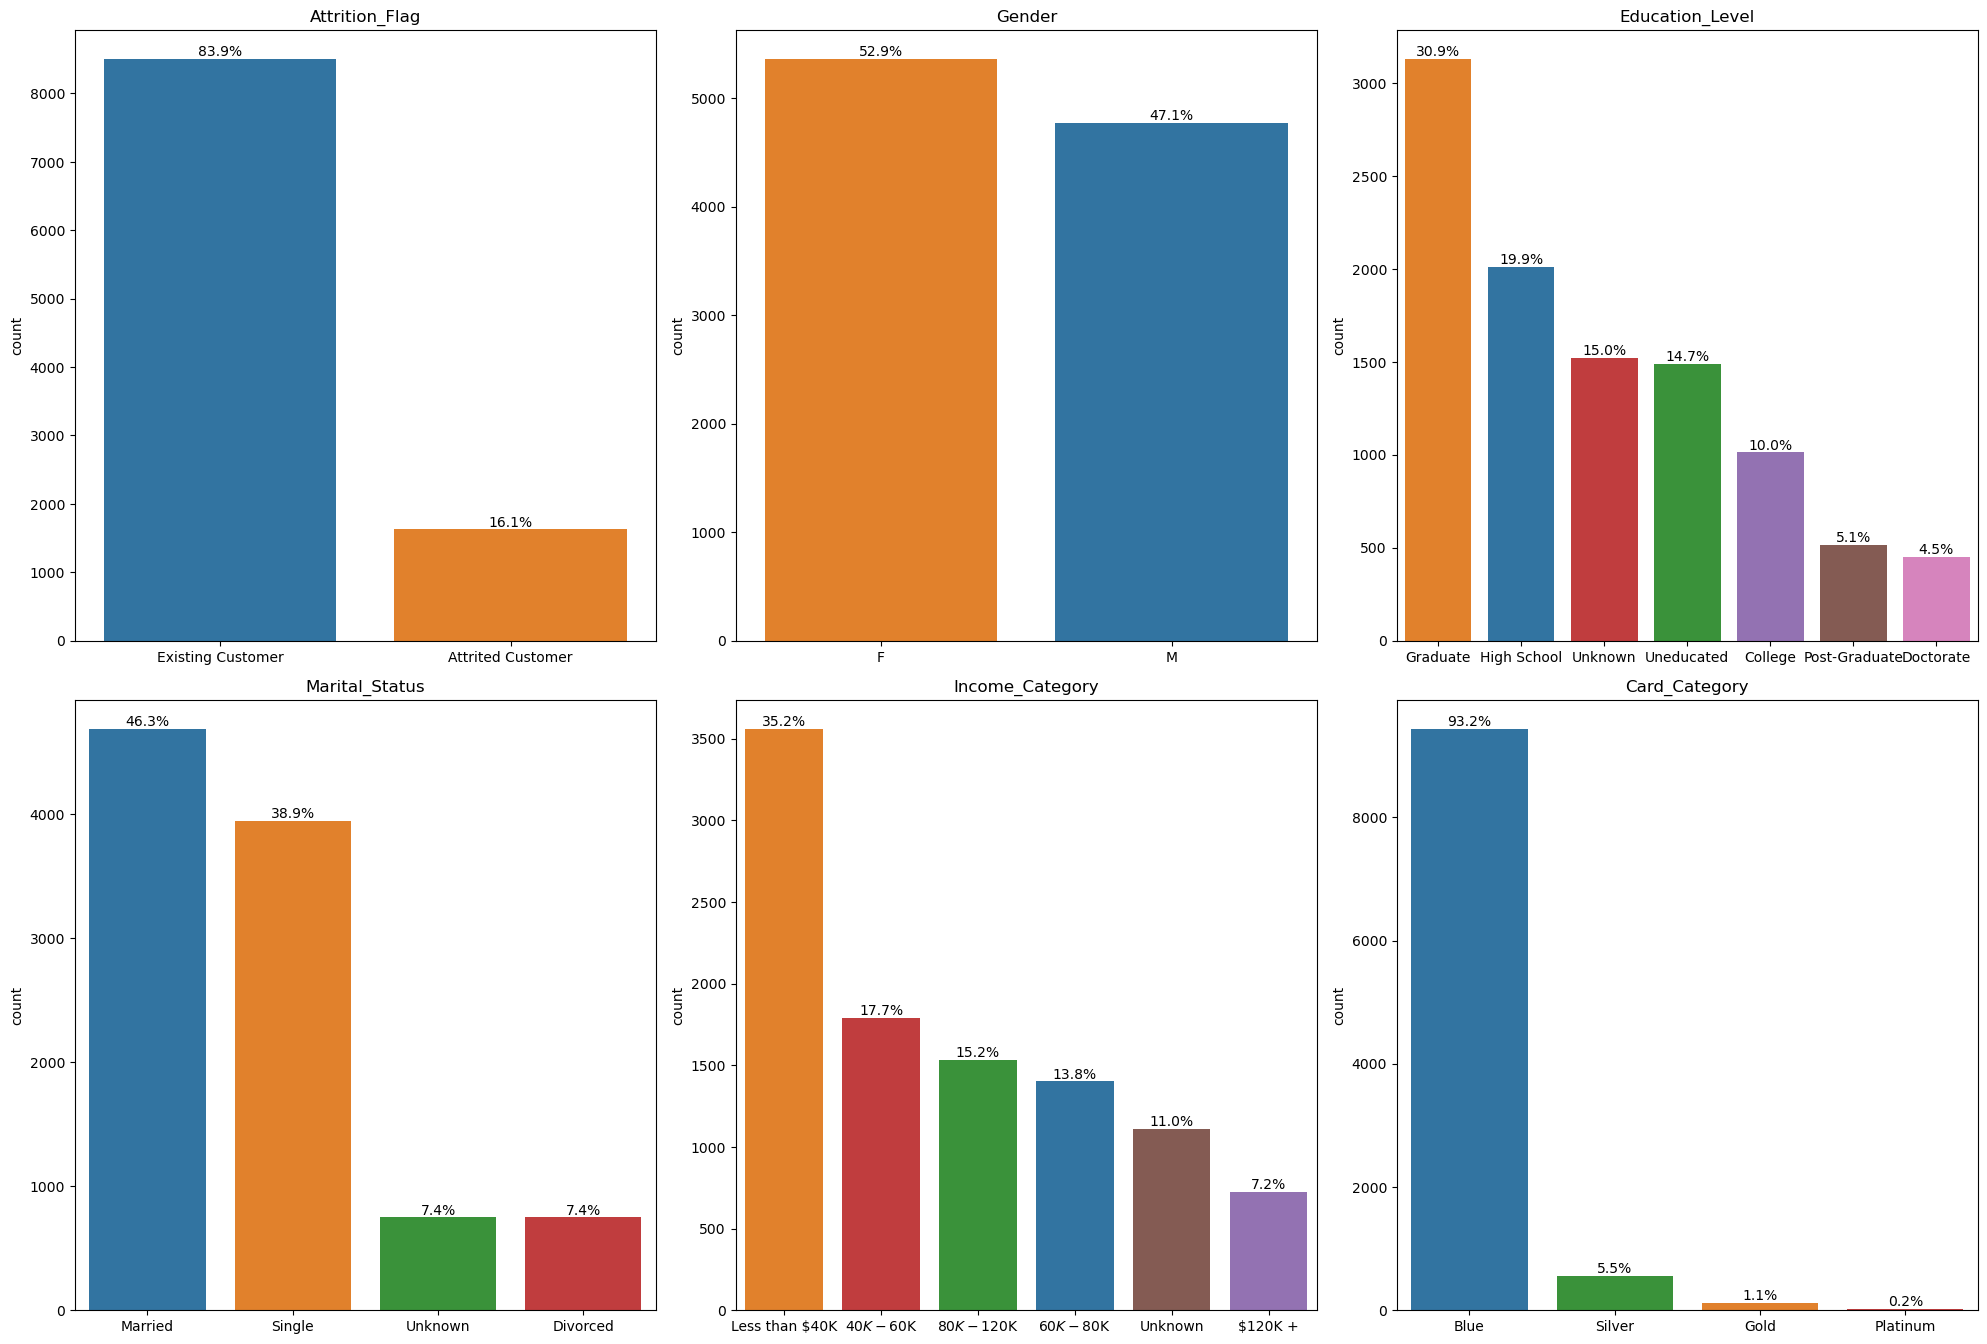

In [5]:
categorical_plot(df,cat_cols,3)